In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
def chart(data):
    #Load the Data
    df = pd.read_csv(data)
    
    #Create a simple moving average with a 30 day window
    SMA_30 = pd.DataFrame()
    SMA_30['Adj_Close_Price'] = df['Adj Close'].rolling(window = 30).mean()
    SMA_30
    
    # Short moving average for 100 days
    SMA_100 = pd.DataFrame()
    SMA_100['Adj_close_price'] = df['Adj Close'].rolling(window = 100).mean()
    SMA_100
    
    # Create a dataframe of all adj close prices
    data = pd.DataFrame()
    data['Date'] = df['Date']
    data['AAL_adj_close'] = df['Adj Close']
    data['SMA_30'] = SMA_30['Adj_Close_Price']
    data['SMA_100']= SMA_100['Adj_close_price']
    
    #Create a Function to signal when to buy and sell
    def buy_sell(data):
        sig_price_buy = []
        sig_price_sell = []
        flag = -1

        for i in range(len(data)):
            if data['SMA_30'][i] > data['SMA_100'][i]:
                if flag != 1:
                    sig_price_buy.append(data['AAL_adj_close'][i])
                    sig_price_sell.append(np.nan)
                    flag = 1
                else:
                    sig_price_buy.append(np.nan)
                    sig_price_sell.append(np.nan)
            elif data['SMA_30'][i] < data['SMA_100'][i]:
                if flag !=0:
                    sig_price_buy.append(np.nan)
                    sig_price_sell.append(data['AAL_adj_close'][i])
                    flag = 0
                else:
                    sig_price_buy.append(np.nan)
                    sig_price_sell.append(np.nan)
            else:
                sig_price_buy.append(np.nan)
                sig_price_sell.append(np.nan)

        return (sig_price_buy, sig_price_sell)
    
    #store the buy and sell data into a variable
    buy_sell = buy_sell(data)
    data['buy_signal_price'] = buy_sell[0]
    data['sell_signal_price']=buy_sell[1]
    
    #Looking for the dates of the buy signals
    buy_dates = data.loc[data['buy_signal_price']>0]
    
    #Looking for the dates of the sell signals
    sell_dates = data.loc[data['sell_signal_price']>0]
    
    #Dropping uneccessary columns
    buy_dates.drop(columns = ['sell_signal_price', 'SMA_30', 'SMA_100'], inplace = True)
    sell_dates.drop(columns = ['buy_signal_price', 'SMA_30', 'SMA_100'], inplace = True)
    
    # DF of dates with prices
    dates = pd.concat([buy_dates, sell_dates],sort = True)
    
    # Now to organize by the dates, drop adj_close price column, and make date the index
    dates.sort_values(by = 'Date', inplace = True)
    dates.drop(columns = ['AAL_adj_close'],inplace = True)
    dates.set_index('Date', inplace = True)
    
    #visualize data and strategy to buy and sell stock
    ab = plt.figure(figsize=(12,8))
    plt.plot(data['AAL_adj_close'],label = 'PMAC', alpha = 0.35)
    plt.plot(data['SMA_30'], label = 'SMA30', alpha = 0.35)
    plt.plot(data['SMA_100'],label = 'SMA100', alpha = 0.35)
    plt.scatter(data.index, data['buy_signal_price'],label = 'Buy',marker = '^', color = 'green')
    plt.scatter(data.index, data['sell_signal_price'], label = 'Sell', marker = 'v', color = 'red')
    plt.title('{} adj close price history buy and sell signals'.format(x))
    plt.xlabel('August 19, 2015 - August,19 2020')
    plt.ylabel('Adj close price USD')
    plt.legend()
    plt.show()
    print(dates)
    
    return
    

Enter Stock: 


 Updated AAPL Chart


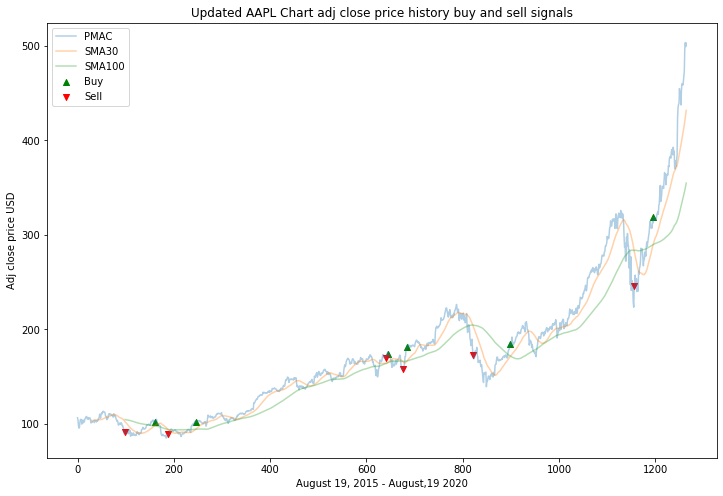

            buy_signal_price  sell_signal_price
Date                                           
2016-01-11               NaN          91.442703
2016-04-08        101.391273                NaN
2016-05-18               NaN          88.771683
2016-08-10        101.938248                NaN
2018-03-07               NaN         169.412445
2018-03-13        174.193893                NaN
2018-04-25               NaN         158.397659
2018-05-09        181.346710                NaN
2018-11-20               NaN         173.165588
2019-03-18        184.756653                NaN
2020-03-24               NaN         245.770386
2020-05-20        318.655487                NaN


In [27]:
print('Enter Stock: ')
x = input()
chart('{}.csv'.format(x))